In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KernelDensity
from scipy.stats import norm


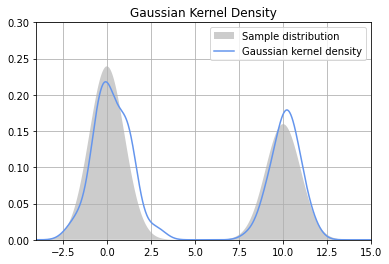

In [2]:
# Plot the 1D density curve for the gaussian kernel

# Create a sample distribution
N = 100
X = np.concatenate((np.random.normal(0, 1, int(0.6 * N)),
					np.random.normal(10, 1, int(0.4 * N)))
				)[:, np.newaxis]
X_plot = np.linspace(-5, 15, 1000)[:, np.newaxis]

# Calculate the true density
true_density = 0.6 * norm(0, 1).pdf(X_plot[:, 0]) + \
			0.4 * norm(10, 1).pdf(X_plot[:, 0])

# Creating a figure
fig, ax = plt.subplots()

# Plotting the true density
ax.fill(
	X_plot[:, 0], true_density,
	fc='black', alpha=0.2,
	label='Sample distribution'
)

# Calculating the density using the gaussian kernel with bandwidth 0.5
kde = KernelDensity(kernel='gaussian', bandwidth=0.5).fit(X)

# Calculating the log of the probability density function
log_dens = kde.score_samples(X_plot)

# Plotting the density curve
ax.plot(
	X_plot[:, 0],
	np.exp(log_dens),
	color="cornflowerblue",
	linestyle="-",
	label="Gaussian kernel density"
)

# Set the title, x and y labels of the plot
ax.set_title("Gaussian Kernel Density")
ax.set_xlim(-4, 15)
ax.set_ylim(0, 0.3)
ax.grid(True)
ax.legend(loc='upper right')

# Display the plot
plt.show()


In [3]:
densities = np.exp(log_dens)
average_density = np.mean(densities)
stdev_density = np.std(densities)
print(densities.shape)
print("The avg of the density values is: ", average_density)
print("The stdev_density of the density values is: ", stdev_density)

(1000,)
The avg of the density values is:  0.049949999996414834
The stdev_density of the density values is:  0.06777862866645769


In [4]:
log_density_vals = kde.score_samples(X)
density_validation = np.exp(log_density_vals)
print(density_validation.shape)


(100,)


In [6]:
average_density = np.mean(density_validation)
stdev_density = np.std(density_validation)

print("The avg of the density values is: ", average_density)
print("The stdev_density of the density values is: ", stdev_density)

The avg of the density values is:  0.15352308483717036
The stdev_density of the density values is:  0.0528225081332941


(array([2., 2., 0., 0., 1., 1., 0., 1., 0., 2., 0., 1., 1., 1., 2., 0., 0.,
        0., 1., 1., 1., 2., 0., 0., 1., 1., 0., 1., 3., 0., 3., 2., 1., 3.,
        2., 6., 7., 4., 8., 6., 5., 1., 1., 2., 2., 3., 4., 2., 5., 8.]),
 array([0.0158619 , 0.01990532, 0.02394874, 0.02799216, 0.03203558,
        0.036079  , 0.04012242, 0.04416584, 0.04820926, 0.05225268,
        0.0562961 , 0.06033952, 0.06438293, 0.06842635, 0.07246977,
        0.07651319, 0.08055661, 0.08460003, 0.08864345, 0.09268687,
        0.09673029, 0.10077371, 0.10481713, 0.10886055, 0.11290397,
        0.11694739, 0.12099081, 0.12503422, 0.12907764, 0.13312106,
        0.13716448, 0.1412079 , 0.14525132, 0.14929474, 0.15333816,
        0.15738158, 0.161425  , 0.16546842, 0.16951184, 0.17355526,
        0.17759868, 0.1816421 , 0.18568552, 0.18972893, 0.19377235,
        0.19781577, 0.20185919, 0.20590261, 0.20994603, 0.21398945,
        0.21803287]),
 <BarContainer object of 50 artists>)

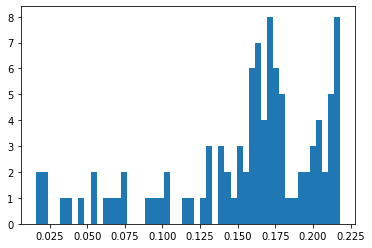

In [7]:
plt.hist(density_validation, bins=50)